Importig Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Getting data

In [2]:
data = pd.read_csv('CarPrice.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Data Analysis


In [3]:
# Data columns
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# Checking for null values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Dropping the column "car_ID"
data = data.drop(['car_ID'], axis = 1)

In [8]:
data['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [9]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
# Keeping only the company name
data['CarName'] = data['CarName'].str.split(' ').str.slice(0,1).str.join(' ')

# Correcting spelling mistakes in "CarName"
dict = {'vw': 'volkswagen', 'vokswagen': 'volkswagen', 'nissan':'Nissan', 'porcshce':'porsche',
         'toyouta':'toyota', 'maxda': 'mazda'}
data['CarName'] = data['CarName'].replace(dict).str.lower()
data['CarName'].value_counts()

CarName
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [11]:
# Fuel Type
data['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [12]:
# Aspiration 
data['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [13]:
# Door Number
data['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [14]:
data['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x1e59d594370>,
 [Text(0.1093915054650566, 1.0945471659696024, 'convertible'),
  Text(-0.7063486918830084, -0.8432505709901198, 'hatchback'),
  Text(0.7566804046641918, -0.7983951184703191, 'sedan'),
  Text(1.0487360428184476, -0.3318926219329134, 'wagon'),
  Text(1.0953532331959253, -0.10100145804508474, 'hardtop')],
 [Text(0.05966809389003087, 0.5970257268925104, '46.8%'),
  Text(-0.3852811046634591, -0.45995485690370164, '34.1%'),
  Text(0.4127347661804683, -0.4354882464383558, '12.2%'),
  Text(0.572037841537335, -0.18103233923613457, '3.9%'),
  Text(0.5974653999250501, -0.05509170438822804, '2.9%')])

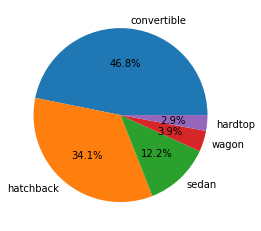

In [15]:
# Pie chart for 'carbody' distribution
labels = data['carbody'].unique()
freq = data['carbody'].value_counts()

plt.pie(freq, labels=labels, autopct='%1.1f%%')

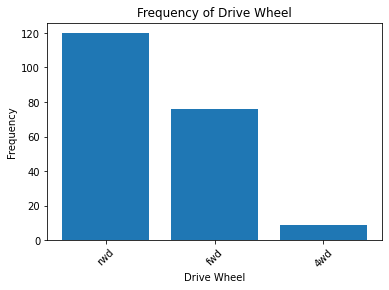

In [16]:
# Count the frequency of each type of 'Drivewheel'
type = data['drivewheel'].unique()
freq = data['drivewheel'].value_counts()

# Create the bar plot
plt.bar(type, freq)

# Set labels and title
plt.xlabel('Drive Wheel')
plt.ylabel('Frequency')
plt.title('Frequency of Drive Wheel')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [17]:
# Engine location
data['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [18]:
# Wheelbase
data['wheelbase'].value_counts()

wheelbase
94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: count, dtype: int64

Text(0, 0.5, 'price')

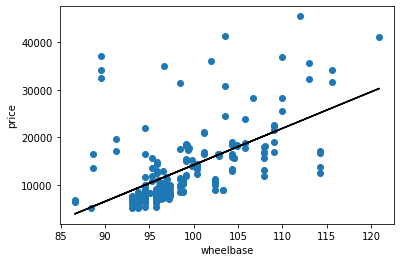

In [19]:
# Graph between wheelbase and price
wheelbase = data['wheelbase']
price = data['price']

# Perform linear regression
coefficients = np.polyfit(wheelbase, price, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept

# Generate best fit line data
best_fit_line = m * wheelbase + b

plt.scatter(wheelbase, price)
plt.plot(wheelbase, best_fit_line, color='black', label='Best Fit Line')

plt.xlabel('wheelbase')
plt.ylabel('price')

In [20]:
# Carlength
data['carlength'].value_counts()

carlength
157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
         ..
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: count, Length: 75, dtype: int64

Text(0, 0.5, 'Price')

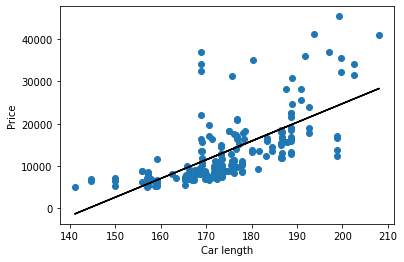

In [21]:
# Graph between carlength and price
clength = data['carlength']
price = data['price']

# Perform linear regression
coefficients = np.polyfit(clength, price, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept

# Generate best fit line data
best_fit_line = m * clength + b

plt.scatter(clength, price)
plt.plot(clength, best_fit_line, color='black', label='Best Fit Line')

plt.xlabel('Car length')
plt.ylabel('Price')

In [22]:
"""No proper relation between carheight and price, 
    hence dropping the carheight"""
data = data.drop(['carheight'], axis=1)

In [23]:
# Curbweight
data['curbweight'].value_counts()

curbweight
2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: count, Length: 171, dtype: int64

Text(0, 0.5, 'Price')

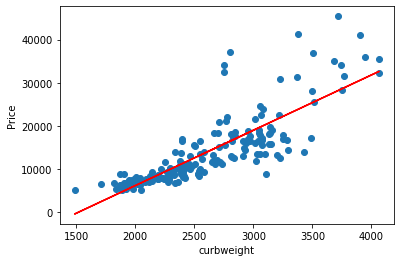

In [24]:
# Graph between curbweight and price
curbweight = data['curbweight']
price = data['price']

# Perform linear regression
coefficients = np.polyfit(curbweight, price, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept

# Generate best fit line data
best_fit_line = m * curbweight + b

plt.scatter(curbweight, price)
plt.plot(curbweight, best_fit_line, color='red', label='best fit line')

plt.xlabel('curbweight')
plt.ylabel('Price')

In [25]:
data['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [26]:
# Converting "cylindernumber" from string to integer
dict = {'two': 2,'three': 3,'four': 4, 'five' : 5, 'six' : 6, 'eight' : 8, 'twelve' : 12}

data['cylindernumber'] = data['cylindernumber'].replace(dict)
data['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [27]:
data['horsepower'].value_counts()

horsepower
68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
101     6
62      6
88      6
145     5
76      5
97      5
84      5
90      5
82      5
102     5
92      4
111     4
123     4
86      4
207     3
73      3
182     3
121     3
85      3
152     3
176     2
94      2
56      2
112     2
161     2
184     2
155     2
156     2
52      2
100     2
162     2
140     1
115     1
134     1
78      1
142     1
288     1
143     1
48      1
200     1
58      1
55      1
60      1
175     1
154     1
72      1
120     1
64      1
135     1
262     1
106     1
Name: count, dtype: int64

Text(0, 0.5, 'Price')

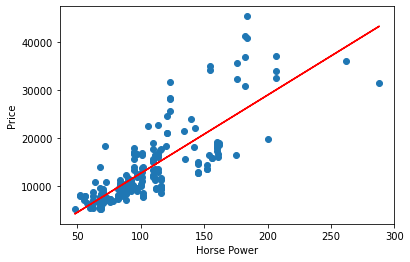

In [28]:
horse_power = data['horsepower']
price = data['price']

# Perform linear regression
coefficients = np.polyfit(horse_power, price, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept

# Generate best fit line data
best_fit_line = m * horse_power + b

plt.plot(horse_power, best_fit_line, color='red', label='best fit line')

plt.scatter(horse_power, price)
plt.xlabel('Horse Power')
plt.ylabel('Price')

In [29]:
# Finding the avg of 'citympg' and 'highwaympg' and storing the value in 'mpg'
data['mpg'] = (data['citympg'] + data['highwaympg'])/2
data = data.drop(['citympg', 'highwaympg'], axis = 1)
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'price', 'mpg'],
      dtype='object')

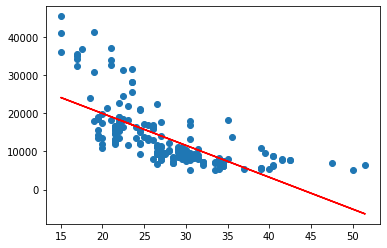

In [30]:
mpg = data['mpg']
price = data['price']

# Perform linear regression
coefficients = np.polyfit(mpg, price, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept

# Generate best fit line data
best_fit_line = m * mpg + b

plt.plot(mpg, best_fit_line, color='red', label='best fit line')

plt.scatter(mpg, price)

Data Preprocessing

In [31]:
"""LabelEncoding the columns:
    'carbody', 'drivewheel', 'enginetype', 'fuelsystem', 'CarName' """
list = ['carbody', 'drivewheel', 'enginetype', 'fuelsystem', 'CarName']

le = LabelEncoder()
for col in list:
    data[col] = le.fit_transform(data[col])

data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpg
0,3,0,gas,std,two,0,2,front,88.6,168.8,...,4,130,5,3.47,2.68,9.0,111,5000,13495.0,24.0
1,3,0,gas,std,two,0,2,front,88.6,168.8,...,4,130,5,3.47,2.68,9.0,111,5000,16500.0,24.0
2,1,0,gas,std,two,2,2,front,94.5,171.2,...,6,152,5,2.68,3.47,9.0,154,5000,16500.0,22.5
3,2,1,gas,std,four,3,1,front,99.8,176.6,...,4,109,5,3.19,3.40,10.0,102,5500,13950.0,27.0
4,2,1,gas,std,four,3,0,front,99.4,176.6,...,5,136,5,3.19,3.40,8.0,115,5500,17450.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,21,gas,std,four,3,2,front,109.1,188.8,...,4,141,5,3.78,3.15,9.5,114,5400,16845.0,25.5
201,-1,21,gas,turbo,four,3,2,front,109.1,188.8,...,4,141,5,3.78,3.15,8.7,160,5300,19045.0,22.0
202,-1,21,gas,std,four,3,2,front,109.1,188.8,...,6,173,5,3.58,2.87,8.8,134,5500,21485.0,20.5
203,-1,21,diesel,turbo,four,3,2,front,109.1,188.8,...,6,145,3,3.01,3.40,23.0,106,4800,22470.0,26.5


In [32]:
"""Creating X -> contains all the input columns
    y -> contains the output column('price')"""
X = data.drop(['price'], axis = 1)
y = data['price']

In [33]:
"""Applying OneHotEncoder using ColumnTransformer for the columns:
    'fueltype', 'aspiration', 'doornumber', 'enginelocation'"""
list = ['fueltype', 'aspiration', 'doornumber', 'enginelocation']

ohe = OneHotEncoder(sparse=False, drop='first')

transformer = ColumnTransformer(
    transformers = [('tf1', ohe, list)], remainder='passthrough')

X = transformer.fit_transform(X)

c:\Users\trush\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
X

array([[1.00e+00, 0.00e+00, 1.00e+00, ..., 1.11e+02, 5.00e+03, 2.40e+01],
       [1.00e+00, 0.00e+00, 1.00e+00, ..., 1.11e+02, 5.00e+03, 2.40e+01],
       [1.00e+00, 0.00e+00, 1.00e+00, ..., 1.54e+02, 5.00e+03, 2.25e+01],
       ...,
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 1.34e+02, 5.50e+03, 2.05e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.06e+02, 4.80e+03, 2.65e+01],
       [1.00e+00, 1.00e+00, 0.00e+00, ..., 1.14e+02, 5.40e+03, 2.20e+01]])

In [35]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

Train Test split

In [36]:
# Splitting the data into training and testing set data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.shape

(164, 22)

In [38]:
y_train.shape

(164,)

In [39]:
X_test.shape

(41, 22)

In [40]:
y_test.shape

(41,)

Model

In [41]:
"""Applying the Random Forest Regression model to the data"""
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=2)

# Fit the regressor to the training data
rfr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfr.predict(X_test)

In [42]:
"""Calculating the r2 score of the model"""
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared score:", r2)

R-squared score: 0.9566098918039453


Graph between y_pred and y_test

Text(0.5, 1.0, 'Prediction value vs Test value')

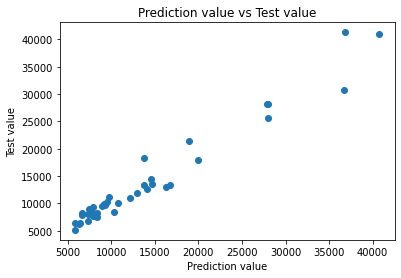

In [43]:
plt.scatter(y_pred, y_test)

plt.xlabel('Prediction value')
plt.ylabel('Test value')
plt.title('Prediction value vs Test value')